In [130]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pingouin as pg

In [150]:
df_ruc = pd.read_csv('../../data/interim/RURAL_URBAN_CODES_2013.csv')
df_venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')
df_venue_by_county = pd.read_csv('../../data/interim/VENUES_PER_COUNTY.csv')

In [132]:
df_ruc.groupby(['RUCC_2013','Description']).size()

df_eda = df_ruc.copy()

df_venues = df_venues.groupby(by=['state','county']).size().reset_index(name='num_venues')


df_eda = df_eda.merge(df_venues, on=['county','state'], how='left')
df_eda = df_eda.fillna(0)

Null Hypothesis: there is no relationship between proximity to large urban areas and quantity of cryto-business

In [133]:
df_eda.shape

(3133, 5)

<AxesSubplot:>

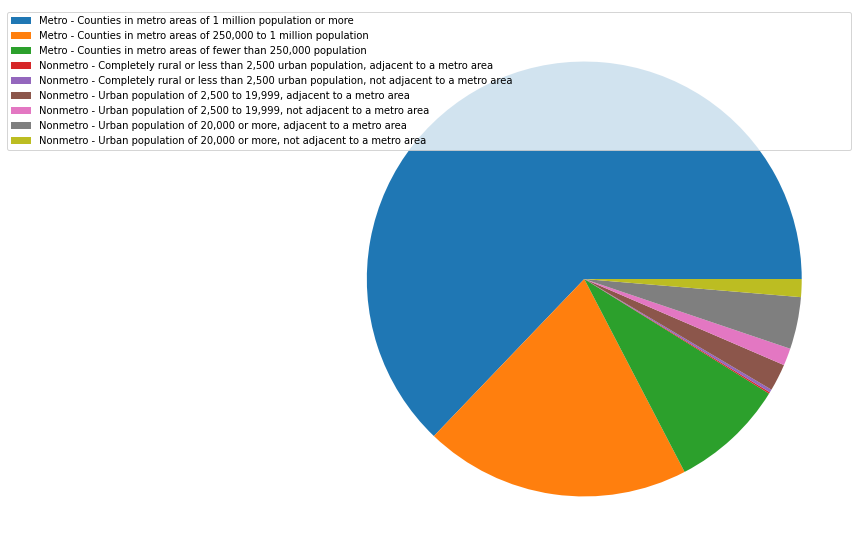

In [134]:
df_eda.groupby('Description').sum().plot.pie(y='num_venues',ylabel='',labels=None,legend=True,figsize=[10,10])


In [135]:
df_eda['IS_URBAN'] = df_eda['RUCC_2013'] <= 3

<AxesSubplot:>

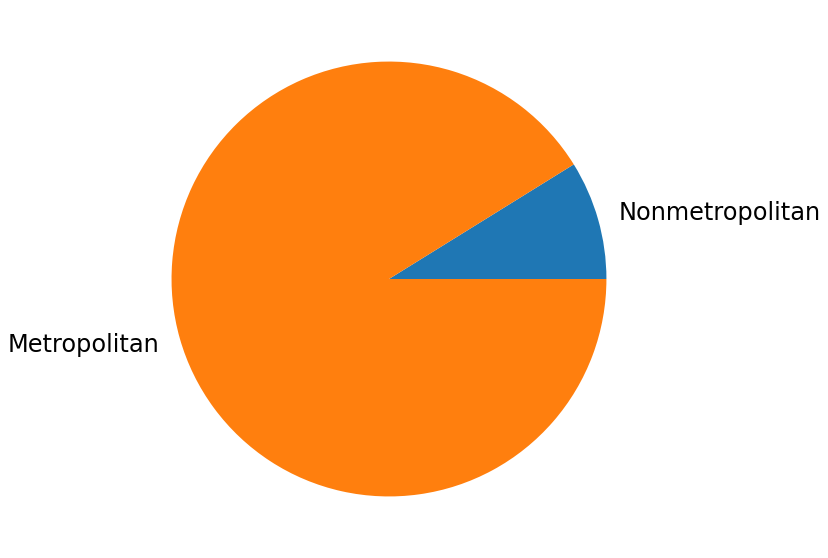

In [136]:
df_eda.groupby('IS_URBAN').sum().plot.pie(y='num_venues',ylabel='',labels=['Nonmetropolitan','Metropolitan'],legend=False,figsize=[10,10],fontsize=24)


In [137]:
rural_cnt = df_eda[df_eda["IS_URBAN"]==False]["num_venues"].dropna(how="any")
urban_cnt = df_eda[df_eda["IS_URBAN"]==True]["num_venues"].dropna(how="any")

res = pg.ttest(rural_cnt, urban_cnt)

res

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-11.693235,1174.931571,two-sided,5.862506e-30,"[-5.36, -3.82]",0.558952,3.569e+27,1.0


In [138]:
df_eda.groupby('IS_URBAN').sum()

,RUCC_2013,num_venues
IS_URBAN,,
False,13395,551.0
True,2258,5685.0


In [139]:
df_eda.groupby('IS_URBAN')['num_venues'].describe()

,count,mean,std,min,25%,50%,75%,max
IS_URBAN,,,,,,,,
False,1966.0,0.280264,1.074946,0.0,0.0,0.0,0.0,36.0
True,1167.0,4.871465,13.387442,0.0,0.0,1.0,4.0,221.0


In [140]:
df_eda.groupby('Description')['num_venues'].describe()

,count,mean,std,min,25%,50%,75%,max
Description,,,,,,,,
Metro - Counties in metro areas of 1 million population or more,432.0,9.071759,20.647117,0.0,0.0,2.0,7.0,221.0
"Metro - Counties in metro areas of 250,000 to 1 million population",379.0,3.255937,5.282039,0.0,0.0,1.0,5.0,37.0
"Metro - Counties in metro areas of fewer than 250,000 population",356.0,1.494382,2.385985,0.0,0.0,1.0,2.0,23.0
"Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",220.0,0.031818,0.175916,0.0,0.0,0.0,0.0,1.0
"Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area",416.0,0.033654,0.331222,0.0,0.0,0.0,0.0,6.0
"Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area",593.0,0.212479,0.531488,0.0,0.0,0.0,0.0,5.0
"Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area",431.0,0.185615,0.730006,0.0,0.0,0.0,0.0,12.0
"Nonmetro - Urban population of 20,000 or more, adjacent to a metro area",214.0,1.126168,2.656901,0.0,0.0,1.0,1.0,36.0
"Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area",92.0,0.902174,0.961452,0.0,0.0,1.0,1.0,5.0


In [142]:
# consistent witht the summmary statistics, we see that the most of the venues are located in
# large cities, with California in particular dominating the top two spots and 6 of the top 25 spots. 
top_15_cnty = df_eda.sort_values('num_venues',ascending=False).head(15)
top_15_cnty

,state,county,RUCC_2013,Description,num_venues,IS_URBAN
194,California,Los Angeles,1,Metro - Counties in metro areas of 1 million p...,221.0,True
213,California,San Francisco,1,Metro - Counties in metro areas of 1 million p...,120.0,True
600,Illinois,Cook,1,Metro - Counties in metro areas of 1 million p...,114.0,True
1738,Nevada,Clark,1,Metro - Counties in metro areas of 1 million p...,107.0,True
352,Florida,Miami-Dade,1,Metro - Counties in metro areas of 1 million p...,105.0,True
2739,Texas,Travis,1,Metro - Counties in metro areas of 1 million p...,93.0,True
1848,New York,New York,1,Metro - Counties in metro areas of 1 million p...,93.0,True
212,California,San Diego,1,Metro - Counties in metro areas of 1 million p...,88.0,True
361,Florida,Pinellas,1,Metro - Counties in metro areas of 1 million p...,80.0,True
2613,Texas,Harris,1,Metro - Counties in metro areas of 1 million p...,78.0,True


In [143]:
# One thing to investigate is the outlier in counties with a code of 4
# (nonmetro, Urban population of 20,000 or more, adjacent to a metro area).
# The county turns out to be Cheshire, New Hampsire 
df_eda.loc[df_eda.RUCC_2013==4].sort_values(by="num_venues",ascending=False)[0:10]

,state,county,RUCC_2013,Description,num_venues,IS_URBAN
1756,New Hampshire,Cheshire,4,"Nonmetro - Urban population of 20,000 or more,...",36.0,False
204,California,Nevada,4,"Nonmetro - Urban population of 20,000 or more,...",8.0,False
1760,New Hampshire,Merrimack,4,"Nonmetro - Urban population of 20,000 or more,...",7.0,False
268,Colorado,La Plata,4,"Nonmetro - Urban population of 20,000 or more,...",6.0,False
1172,Maine,Kennebec,4,"Nonmetro - Urban population of 20,000 or more,...",6.0,False
3102,Wisconsin,Walworth,4,"Nonmetro - Urban population of 20,000 or more,...",4.0,False
396,Georgia,Camden,4,"Nonmetro - Urban population of 20,000 or more,...",3.0,False
2964,Washington,Lewis,4,"Nonmetro - Urban population of 20,000 or more,...",3.0,False
682,Illinois,Whiteside,4,"Nonmetro - Urban population of 20,000 or more,...",3.0,False
1902,North Carolina,Cleveland,4,"Nonmetro - Urban population of 20,000 or more,...",3.0,False


In [144]:
df_nh = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')

In [145]:
df_nh = df_nh.loc[(df_nh.state=='New Hampshire') & (df_nh.county=='Cheshire')]

<AxesSubplot:title={'center':'Venues by Type: Cheshire, New Hampshire'}, xlabel='category'>

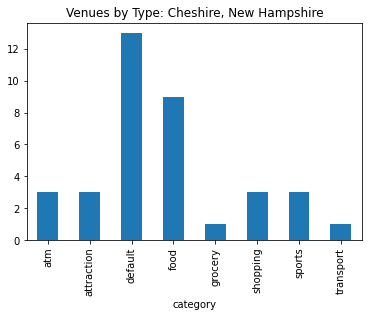

In [146]:
df_nh_cat = df_nh['category']
df_nh_cat.groupby(df_nh_cat).count().plot.bar(title='Venues by Type: Cheshire, New Hampshire')


In [184]:
df_venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')
df_venues['IS_ATM'] = df_venues.category == 'atm'

df_eda = df_ruc.copy()

df_venues = df_venues.groupby(by=['state','county', 'IS_ATM']).size().reset_index(name='num_venues')


df_eda = df_eda.merge(df_venues, on=['county','state'], how='left')
df_eda = df_eda.fillna(0)

In [196]:
df_eda = df_eda[df_eda.county.isin(top_15_cnty.county) & df_eda.state.isin(top_15_cnty.state)]

df_top_15 = df_eda.merge(top_15_cnty, on=['county','state'], how='inner')

df_top_15 = df_top_15[['state','county','IS_ATM','num_venues_x']]

df_top_15 

,state,county,IS_ATM,num_venues_x
0,Arizona,Maricopa,False,45.0
1,Arizona,Maricopa,True,32.0
2,California,Los Angeles,False,141.0
3,California,Los Angeles,True,80.0
4,California,Orange,False,50.0
5,California,Orange,True,23.0
6,California,San Diego,False,72.0
7,California,San Diego,True,16.0
8,California,San Francisco,False,114.0
9,California,San Francisco,True,6.0


Text(0, 0.5, 'Total')

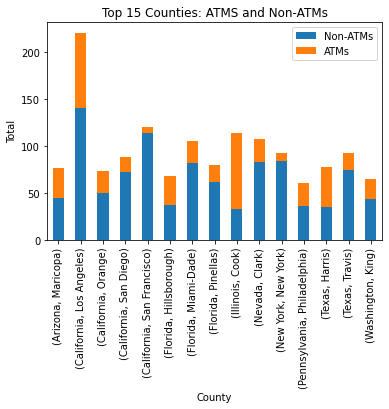

In [206]:
#df.groupby(['NFF', 'ABUSE']).size().unstack().plot(kind='bar', stacked=True)
df_top_15 .groupby(['state','county','IS_ATM']).sum().unstack().plot(kind='bar', stacked=True, title = 'Top 15 Counties: ATMS and Non-ATMs')
plt.legend(["Non-ATMs", "ATMs"])
plt.xlabel('County')
plt.ylabel('Total')

In [118]:
df_eda

,state,county,RUCC_2013,Description,IS_ATM,num_venues
215,California,Los Angeles,1,Metro - Counties in metro areas of 1 million p...,False,141.0
243,California,San Francisco,1,Metro - Counties in metro areas of 1 million p...,False,114.0
2094,New York,New York,1,Metro - Counties in metro areas of 1 million p...,False,84.0
1958,Nevada,Clark,1,Metro - Counties in metro areas of 1 million p...,False,83.0
428,Florida,Miami-Dade,1,Metro - Counties in metro areas of 1 million p...,False,82.0
...,...,...,...,...,...,...
3444,Wisconsin,Dane,2,"Metro - Counties in metro areas of 250,000 to ...",True,7.0
2354,Ohio,Lake,1,Metro - Counties in metro areas of 1 million p...,True,7.0
1392,Massachusetts,Plymouth,1,Metro - Counties in metro areas of 1 million p...,True,7.0
230,California,Placer,1,Metro - Counties in metro areas of 1 million p...,False,7.0


In [207]:
df_venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')

Text(0.5, 0, 'Year')

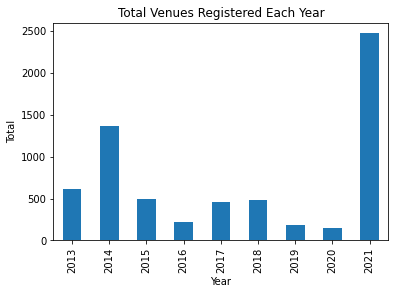

In [224]:
df_venues.groupby('year').size().plot.bar(title='Total Venues Registered Each Year')
plt.ylabel('Total')
plt.xlabel('Year')